In [275]:
using Revise
include("../src/update.jl")

FatTail (generic function with 1 method)

In [283]:
M = Model(N=10^6,T=8,γp=0.15,λp=1.0,distribution=Dirac(3),dilution=0.0);

In [284]:
using ProgressMeter
function Callback(iterations)
    p = Progress(iterations)
    function callback(it, M)
        next!(p)
    end
end

Callback (generic function with 1 method)

In [285]:
iterations = 100
a = time()
conv_it = pop_dynamics!(M; iterations = iterations)#, callback = (it, M) -> println("iter=$it"));
b = time()
println("convergence in $(conv_it) iterations \nTime for exec = $(b-a) s")

LoadError: AssertionError: s > 0

In [286]:
using Plots
N, T = popsize(M), M.T
omarg2D = fill(0.0, 0:T+1, 0:T+1)
for i in 1:N
    for t in 0:T+1
        omarg2D[t, M.τbelief[i]] += M.belief[t,i]/N
    end
end
marg2D = omarg2D.parent;

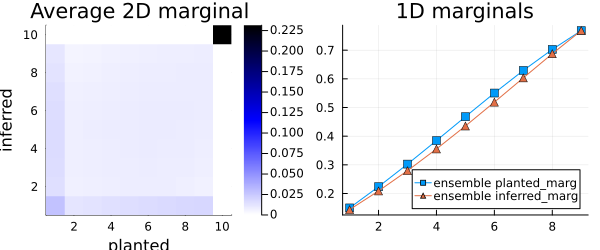

In [280]:
pheat = heatmap((marg2D'),c=[:white,:blue,:black],xlabel="planted",ylabel="inferred",title="Average 2D marginal")
p0 = plot(cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1),marker=:square,label="ensemble planted_marg",title="1D marginals")
p0 = plot!(cumsum(sum(marg2D,dims=2)[1:end-1],dims=1),marker=:utriangle,label="ensemble inferred_marg",legend=:bottomright)
plot(pheat,p0,size=(600,250))

In [274]:
cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1) .- cumsum(sum(marg2D,dims=2)[1:end-1],dims=1)

9-element Vector{Float64}:
  0.005666879815250381
  0.014164798222300573
  0.021920004811813443
  0.02795737990630709
  0.0313409364924393
  0.031142438728235078
  0.02563905409617373
  0.014535898972576122
 -2.220446049250313e-16